<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/T3/Janio_Souza_Lima_ML_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Aprendizado de Máquina - 2021/1**

* **Trabalho 03**
* **Professor**: Eduardo Bezerra
* **Aluno**: Janio de Souza Lima

##Preparação do ambiente

Importação de bibliotecas

In [2]:
%matplotlib inline

In [3]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.io as spio

Carga de arquivos para ambiente (apenas para uso deste notebook no Google Colab)

In [4]:
from google.colab import drive

In [5]:
#Conecta o Google Colab ao Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


A etapa anterior apenas conecta ao seu Google Drive, após rodá-la e autenticar a sessão usando o link da API da Google, o código abaixo deve ser executado para apontar para o diretório de trabalho no qual estão gravados os códigos e bibliotecas personalziadas que serão usados na análise.

A pasta com os dados deve ser gravada neste mesmo diretório com o nome *data*, assim os trechos nos quais os conjuntos de dados são carregados rodarão sem problemas, mas sempre que possível os dados serão carregados diretamente do GitHub no repositório criado pelo professor da disciplina.

In [6]:
#Define o path dos códigos e dados como diretório de trabalho atual
import os
dir = '/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/t3'
os.chdir(dir)

#1 Aprendizado de Comitês

##Análise preliminar dos dados

* **Carga e organização dos dados de treino e teste**

---

Conjunto de dados analisado:

![dataset1](https://github.com/janiosl/python.ds/blob/master/ml/T3/data/dataset1.PNG?raw=true)

**Fonte: Tabela copiada de Eduardo Bezerra, enunciado desse trabalho (Trabalho 03).**

O conjunto de dados está dividido em dois arquivos. Um conjunto de treino com 1500 observações e um de testes com 577 observações. Para realização das análises dessa seção, quando necessário, o conjunto de originalmente separado para treino foi novamente dividido para uso como treino e validação na proporção de 80% para treino e 20% para validação.

In [ ]:
#Definção dos títulos das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

In [ ]:
#Carga do conjunto de treino
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Conferência dos primeiros registros do conjunto de dados
data_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [ ]:
#Estatísticas descritivas do conjunto de treino
data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [ ]:
#Carga do conjunto de teste
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

#Conferência dos primeiros registros do conjunto de dados
data_test.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


* **Variáveis "Dummies" para tratamento de dados categóricos nominais**

Algumas variáveis no conjunto de dados são discretas nominais, ou seja, os valores apresentados não representam uma contagem ordinal, mas categorias. Essa situação pode gerar inconsistências na criação e treinamento de modelos. Para lidar com essa situação serão criadas variáveis *dummies*, ou seja, variáveis que representam cada categoria e assumem valores binários (1 = verdadeiro / 0 = falso).

In [ ]:
#Conferência de valores da variável Estado Civil (ESCT)
print(data_train['ESCT'].head(10),
      data_train['ESCT'].describe(),
      sep='\n\n')

0    1
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: ESCT, dtype: int64

count    1500.000000
mean        0.512000
std         0.659909
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: ESCT, dtype: float64


In [ ]:
#Conferência dos valores possíveis da variável
set(data_train['ESCT'])

{0, 1, 2, 3}

Nota-se pela análise simplificada que as opções para estado civil estão registradas na base de dados como os valores 0, 1, 2 e 3. Para criação de variáveis *dummies* serão criadas $n-1$ variáveis binárias, onde $n$ é o número de categorias. Isso é feito porque a categoria $n$ ocorrerá quando todas as demais tiverem valor 0 e, portanto, não precisa ser mapeada.

---

Para exemplificar a lógica consideremos o estado civil cuja categoria é 0. Podemos consultar o dataframe original da forma abaixo e obtemos um vetor de valores lógicos, no qual é apontado verdadeiro para os casos em que a categoria do estado civil é 0.

In [ ]:
data_train['ESCT']==0

0       False
1        True
2        True
3        True
4       False
        ...  
1495    False
1496    False
1497     True
1498     True
1499     True
Name: ESCT, Length: 1500, dtype: bool

Para criar as variáveis, basta usar esta mesma lógica para as categorias possíveis, transformando os valores lógicos em inteiros. Contudo, a biblioteca `pandas` possui um método denominado `get_dummies` que simplifica esta transformação. Aplicaremos abaixo o método no conjunto de dados.

In [ ]:
pd.get_dummies(data=data_train,
               prefix='ESCT',
               columns=['ESCT'],
               drop_first=True)

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,0,360,0,313,9,52,0,25,48,0,1,1,0,0
1,0,350,1,468,10,65,0,33,6,0,1,0,0,0
2,0,1100,0,829,9,125,0,56,48,0,1,0,0,0
3,0,3000,0,552,12,76,1,31,60,0,1,0,0,0
4,0,1000,0,809,12,111,0,24,7,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,500,0,437,12,60,0,60,48,0,1,1,0,0
1496,0,2057,0,301,1,318,0,35,48,0,1,1,0,0
1497,0,570,0,511,12,71,1,28,144,0,1,0,0,0
1498,0,360,0,384,12,52,0,33,36,0,1,0,0,0


Percebe-se que o atributo 'ESCT' foi substituído pelas variáveis novas e criado um data frame com os dados originais, exceto por esta substituição. Além disso, foi definido o parâmetro `drop_first` com valor `True`, isso força o método a eliminar a primeira categoria, tornando a quantidade de *dummies* igual a $n-1$ pelos motivos explicados anteriormente nessa seção. Para que todas as categorias estejam presentes no novo *data frame*, o parâmetro `drop_first` deve ser descartado, tendo em vista que seu valor padrão é `False`.

In [ ]:
#Usando a lógica estudada para recarregar os dados e refazer a separação
data_train_ = pd.get_dummies(data=data_train,
               prefix='ESCT',
               columns=['ESCT'],
               drop_first=True)

data_train_.head()

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,0,360,0,313,9,52,0,25,48,0,1,1,0,0
1,0,350,1,468,10,65,0,33,6,0,1,0,0,0
2,0,1100,0,829,9,125,0,56,48,0,1,0,0,0
3,0,3000,0,552,12,76,1,31,60,0,1,0,0,0
4,0,1000,0,809,12,111,0,24,7,0,1,1,0,0


In [ ]:
#Usando a lógica estudada para recarregar os dados e refazer a separação
data_test_ = pd.get_dummies(data=data_test,
               prefix='ESCT',
               columns=['ESCT'],
               drop_first=True)

data_test_.head()

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,2,500,1,618,10,85,0,36,6,0,0,0,0,0
1,0,813,0,552,4,119,0,43,48,119,1,1,0,0
2,0,350,0,488,12,66,0,43,0,0,1,0,0,1
3,0,1530,0,381,1,398,0,28,48,0,1,1,0,0
4,0,688,1,396,10,60,0,49,72,0,1,0,0,0


In [ ]:
#Separação da variável alvo não muda
##=======================================

#Transformação da classe alvo de cada conjunto em matrizes
y_train_ = np.array(data_train_['CLASSE'])
y_test = np.array(data_test_['CLASSE'])

#Checagem rápida
print(y_train_[:10],
      y_test[:10],
      sep='\n\n')

[1 1 1 1 1 1 0 1 0 1]

[0 1 1 1 1 0 0 1 0 1]


In [ ]:
#Separação dos atributos precisa atentar que a ordem das colunas mudou
##=============================================================================

#Recuperação dos nomes das colunas
atributos = list(data_train_.columns)

#Eliminação da coluna com a classe na lista de atributos
atributos.remove('CLASSE')

In [ ]:
#Uso da lista de atributos para separação do conjunto de dados
##=============================================================================

#Transformação dos atributos  de cada conjunto em matrizes
X_train_ = np.array(data_train_.loc[:, atributos])
X_test = np.array(data_test_.loc[:, atributos])

In [ ]:
#Conferência das dimensões das matrizes
print(X_train_.shape, y_train_.shape)

(1500, 13) (1500,)


In [ ]:
#Conferência das dimensões das matrizes
print(X_test.shape, y_test.shape)

(577, 13) (577,)


* **Divisão do conjunto originalmente criado como treinamento em novos subconjuntos para**:

* Treino: 80% dos dados do arquivo `credtrain.txt`
* Validação: 20% dos dados do arquivo `credtrain.txt`

In [ ]:
#Separação de treino e validação não muda
##=======================================
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_,
                                                  train_size=0.8,
                                                  random_state=31)

In [ ]:
print(X_train.shape, y_train.shape,
      X_val.shape, y_val.shape)

(1200, 13) (1200,) (300, 13) (300,)


OBSERVAÇÃO: Usamos os nomes das variáveis da forma a seguir para distinguir a carga inicial do conjunto de treino e a separação acima, feita para permitir um processo mais adequado de treino, validação e teste em nossos fluxos de aprendizado de máquina.
* `X_train_` e `y_train_` => Referem-se ao **conjunto de dados de treino com a quantidade de observações original**
* `X_train` e `y_train` => Referem-se ao **subconjunto de dados de treino** equivalente a 80% do conjunto de treino original
* `X_val` e `y_val` => Referem-se ao **subconjunto de dados de validação** equivalente a 20% do conjunto de treino original

In [ ]:
#Checagem rápida de parte dos dados carregados
print(X_train[:5],
      X_val[:5],
      X_test[:5],
      sep='\n\n')

[[   0  649    1  311    2   69    1   40    0  190    1    0    0]
 [   0  610    0  365    5   61    0   62   48   61    0    0    0]
 [   0 1500    0 1099    2  334    0   58    0  438    0    0    0]
 [   0 1000    0  471    3  176    1   45  240    0    1    0    0]
 [   0  322    1  469   10   72    1   40    0    0    0    0    0]]

[[   0  300    1  629   12   55    1   54   60  230    0    0    0]
 [   0  600    1  540   12   73    0   28    6    0    1    0    0]
 [   0  317    1  459   12   63    1   57  264    0    0    0    0]
 [   0  800    0  399    3  149    1   57    0    0    0    0    0]
 [   0 3000    0  360    1  376    0   43   48    0    1    0    0]]

[[   2  500    1  618   10   85    0   36    6    0    0    0    0]
 [   0  813    0  552    4  119    0   43   48  119    1    0    0]
 [   0  350    0  488   12   66    0   43    0    0    0    0    1]
 [   0 1530    0  381    1  398    0   28   48    0    1    0    0]
 [   0  688    1  396   10   60    0   49   

* Normalização das caracterísitcas

Como pode ser vistos nas saídas anteriores dessa seção as características estão em ordens de grandeza diferentes. Para muitos algoritmos este é um problema que pode levar a modelos inadequados. Para resolver este problema realizaremos a normalização dos dados.

In [ ]:
#Criação do transformador para noramlização
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

In [ ]:
#Normalização das características
X_train_ = norm.fit_transform(X_train_)
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)
X_val = norm.fit_transform(X_val)

In [ ]:
#Checagem rápida de parte dos dados normalizados
print(X_train_[0],
      X_train[0],
      X_val[0],
      X_test[0],
      sep='\n\n')

[-0.22118458 -0.68989239 -0.89603829 -0.93761067  0.16833299 -0.79800326
 -0.39336295 -1.22827955  0.31287827 -0.34213664  1.22304549 -0.13791932
 -0.15902987]

[-0.22571286 -0.36532156  1.08711461 -1.04369546 -1.76190355 -0.53210506
  2.61593908 -0.10136066 -0.58683564  1.60979127  1.22050258 -0.13978987
 -0.15456644]

[-0.20317613 -0.71335458  1.24192306  0.16464885  1.02749022 -0.72608932
  2.29128785  0.98354689  0.50513965  2.545207   -0.81083819 -0.13018891
 -0.17586311]

[ 3.69396032 -0.49166148  1.10033085  0.14085423  0.44020867 -0.27731176
 -0.35630482 -0.38533555 -0.46487844 -0.29246359 -0.81708632 -0.13940814
 -0.1943445 ]


##1.1 Boosting

O boosting visa aumentar a acurácia de modelos, pela combinação sequencial e iterativa de classificadores. Isso é feito considerando que dados $k$ classificadores, a iteração vai atualizando os pesos da classificação e usando os resultados para que o próximo classificador aprenda melhor com as falhas de classificação realizadas pelo anterior [Han, 2012].

**CRIAÇÃO E TREINAMENTO DOS MODELOS**

In [ ]:
#Bibliotecas para criação dos indutores
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Nesta aplicação, está sendo usado o próprio AdaBoost como indutor, mas é importante ressaltar a possibilidade de uso da classe `AdaBoostClassifier` em conjunto com outros algoritmos. Para esta aplicação alternativa, o hiperparâmetro `base_estimator` deve receber o algoritmo deejado. Por exemplo, poderia ser adicionado `base_estimator=DecisionTreeClassifier(max_depth=2)` para que fosse realizado o treinamento de indutor usando classificadores de árvore de decisão.

Além disso, tanto para o AdaBoost quanto para o próximo modelo (Gradient Boosting) foram criados indutores sem aplicação de técnicas de sintonização de hiperparâmetros. Com essa alternativa, os modelos treinados usam os hiperparâmetros padrão de cada classificador.

* **AdaBoost**


Partindo da abordagem boosting o algoritmo AdaBoost - Adaptive Boosting, realiza a aplicação iterativa dos classificadores e de acordo com seu erro de classificação determina um peso para o voto de cada classificador. Por fim, para determinar a classificação final, diferentemente do que é feito no bagging cujos votos de todos classificadores tem peso igual, realiza a votação com pesos diferentes para cada classificador [Han, 2012].

In [ ]:
#Criação do indutor AdaBoost sem alteração de hiperparâmetros
adaB_clf = AdaBoostClassifier()

In [ ]:
#Treinamento do modelo usando subconjunto de treino
adaB_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

* **Gradient Boosting**

In [ ]:
#Criação do indutor Gradient Boosting sem alteração de hiperparâmetros
gdB_clf = GradientBoostingClassifier()

In [ ]:
#Treinamento do modelo usando subconjunto de treino
gdB_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**CURVA DE APRENDIZADO**

O trecho a seguir realiza o uso da função `learning_curve` da biblioteca Scikit-Learn para cálculos os dados para visualização da curva de aprendizagem dos modelos treinados nessa seção. Foi usado como pontuação a métrica acurácia, que demonstra o nível atingido por cada modelo à medida que são alteradas as quantidades de observações no conjunto de treinamento e validação.

In [ ]:
#Biblioteca para cálculo da curva de aprendizado
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

A célula abaixo define os parâmetros da forma de separação do conjunto de validação e treino, separando 20% para validação em cada iteração da curva de aprendizado. O uso dessa função será realizada, tendo em vista que os algoritmos de cálculo de curva de aprendizado as próximas etapas dessa seção realizam esta divisão internamente. Este procedimento substituirá, nestas etapas, a divisão anterior realizada com a função `train_test_split`.

In [ ]:
#Definição do critério de validação
#Escolha aleatória de 20% do conjunto para validação para cada iteração
cv = ShuffleSplit(test_size=0.2, random_state=31)

* **Curva de Aprendizado do Modelo AdaBoost**

In [ ]:
#Aplicação da função para comparação dos resultados de validação e treino
#Usando conjunto de treino original (sem a divisão prévia de validação e treino)
_, acc_treino, acc_val = learning_curve(adaB_clf,
                                        X_train_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

In [ ]:
#Cálculo dos scores baseado na média das rodadas
acc_tA = np.mean(acc_treino, axis=1)
acc_vA = np.mean(acc_val, axis=1)

* **Curva de Aprendizado do Modelo Gradient Boosting**

In [ ]:
#Aplicação da função para comparação dos resultados de validação e treino
#Usando conjunto de treino original (sem a divisão prévia de validação e treino)
_, acc_treino, acc_val = learning_curve(gdB_clf,
                                        X_train_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

In [ ]:
#Cálculo dos scores baseado na média das rodadas
acc_tG = np.mean(acc_treino, axis=1)
acc_vG = np.mean(acc_val, axis=1)

* Visualização das curvas de aprendizado calculadas

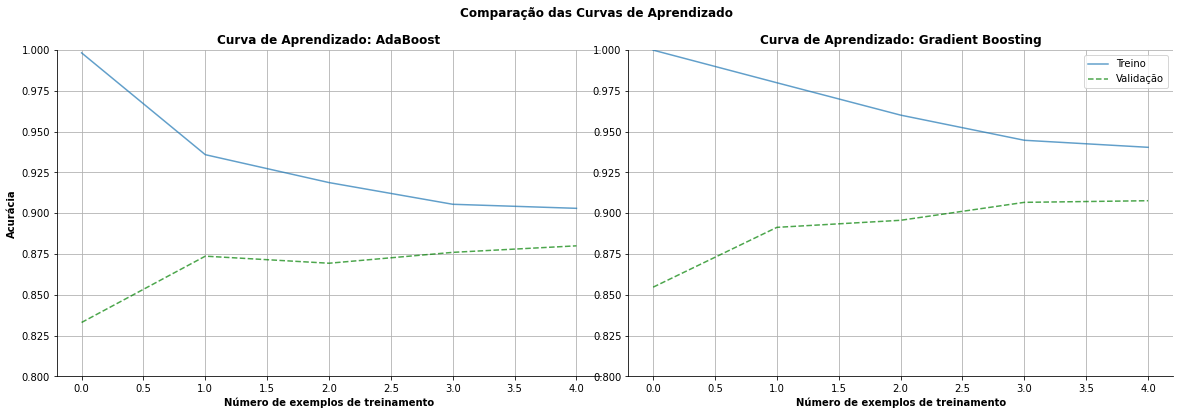

In [ ]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação das Curvas de Aprendizado', fontweight='bold')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


#Curva de aprendizado AdaBoost
#=========================================
ax1.plot(acc_tA, alpha=0.7)         #Treino
ax1.plot(acc_vA, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax1.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax1.set_ylabel('Acurácia', fontweight='bold')
ax1.set_title('Curva de Aprendizado: AdaBoost', fontweight='bold')
ax1.set_ylim(0.8, 1.0)

#Grid acrescentado para facilitar a análise visual da curva
ax1.grid()


#Curva de aprendizado Gradient Boosting
#=========================================
ax2.plot(acc_tG, alpha=0.7)         #Treino
ax2.plot(acc_vG, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax2.legend(['Treino', 'Validação'], loc='upper right')
ax2.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax2.set_title('Curva de Aprendizado: Gradient Boosting', fontweight='bold')
ax2.set_ylim(0.8, 1.0)

#Grid acrescentado para facilitar a análise visual
ax2.grid()

#Distância dos gráficos ajustada de propósito facilitar comparação
plt.subplots_adjust(wspace=0.05)

#Ajustes visuais finais
#=========================================
sns.despine()
plt.savefig('target/plot1.1.png')

Pela análise das curvas de aprendizado$^1$, **ambos modelos aparentam um comportamento similar tanto no conjunto de treino quanto no conjunto de validação**. Percebe-se que **no conjunto de treino a acurácia começa próximo a 100%** (equivalente a 1.000 no eixo y) e decresce à medida que o número de exemplos aumento, mas é mais acentuada no começo para o **o modelo AdaBoost  que mantém-se sempre acima de 0.90**, por outro lado mantém-se numa queda mais suave ao longo do tempo no **Gradient Boosting** ao longo do tempo.

Nas execuções **no conjunto de validação**, por sua vez, os resultados **iniciam-se ligeiramente acima de 0.825** no **Ada Boost** e **acima de 0.85** no **Gradient Boosting**. Depois ambos algoritmos tem um crescimento acentuado no início do conjunto de validação, reduzindo o ritmo um pouco, mas converginto para próximo do patamar da acurácia do conjunto de treino.

* **Modelo AdaBoost**: este algoritmo termina com uma distância menor entre os conjuntos de treino e validação, mas em um patamar de acurácia menor - aproximadamente 0.87 e 0.90 para treino e validação, respectivamente.
* **Modelo Gradient Boosting**: por fim este algoritmo termina com uma distância maior entre os conjuntos de treino e validação, mas em um patamar de acurácia maior - acima de 0.90 e próximo de 0.95 para treino e validação, respectivamente.

(1) OS RESULTADOS PODEM MUDAR EM NOVAS RODADAS EM FUNÇÃO DE USO DE SELEÇÃO ALEATÓRIA EM ALGUMAS PARTES DAS EXECUÇÕES. ISSO É MINIZADO PELO USO DO PARÂMETRO `random_state`, MAS NÃO É ELIMINADO COMPLETAMENTE.

**PREDIÇÃO E AVALIAÇÃO DOS MODELOS**

Aplicação dos modelos para predição e avaliação do escore com o conjunto de testes.

In [ ]:
#Biblioteca para geração do relatório de classificação de modelos
from sklearn.metrics import classification_report

In [ ]:
#AdaBoost
#========================================
#Uso dos modelos para predição
y_pred_adaB = adaB_clf.predict(X_test)

#Visualização das primeiras observações da predição efetuada
y_pred_adaB[:5]

array([0, 1, 1, 1, 0])

In [ ]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_adaB))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       306
           1       0.92      0.82      0.86       271

    accuracy                           0.88       577
   macro avg       0.88      0.88      0.88       577
weighted avg       0.88      0.88      0.88       577



In [ ]:
#Gradient Boosting
#========================================
#Uso dos modelos para predição
y_pred_gdB = gdB_clf.predict(X_test)

#Visualização das primeiras observações da predição efetuada
y_pred_gdB[:5]

array([0, 1, 1, 1, 0])

In [ ]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_gdB))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       306
           1       0.97      0.82      0.89       271

    accuracy                           0.90       577
   macro avg       0.92      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



Na avaliação final dos modelos no conjunto de testes, o `Gradient Boosting` apresenta resultados superiores. Considerando a classe positiva, que indica que o cliente pagaria o crédito concedido, o modelo baseado no `AdaBoost` consegue uma precisão de 0.92 contra 0.97 do `Gradient Boosting`. A situação se repete nas métricas de acurácia e F1, em que o modelo `Gradient Boosting` também apresenta resultados superiores, apesar de serem resultados mais próximos, como pode ser visto nas saídas anteriores do relatório de classificação gerados com a função `classification_report`.

##1.2 Bagging

Esta abordagem visa usar o mesmo algoritmo e treiná-los diversas vezes com amostragens aleatórias do conjunto de treinamento.
* Bagging (Bootstrap aggregating): Realizar a amostragem com substituição.

As previsões são realizadas agregando previsões de todos os previsores treinados.

**CRIAÇÃO E TREINAMENTO DOS MODELOS**

* **Classificador Bagging baseado em k-NN**

In [ ]:
#Bibliotecas para criação dos indutores
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Criação do indutor Bagging Classifier baseado no Knn

#Definição arbitrária do hiperparâmetro k
k = 15

#Criação do modelo
bgKNN_clf = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=k),
    bootstrap=True)

In [ ]:
#Treinamento do modelo usando subconjunto de treino
bgKNN_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=15, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

* **Classificador Bagging Random Forest**

Random Forests é um método ensemble learning baseado em Decision Trees, ou seja, o algoritmo é construído com base no treinamento de diversas árvores de decisão. [Han, 2012]

A imagem a seguir ilustra o conceito das múltiplas árvores sendo usadas:

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

**Figura 1 - Ilustração de uma floresta aleatória ([Wikipedia](https://en.wikipedia.org/wiki/Random_forest))**

In [ ]:
#Criação do indutor bagging com o algoritmo RandomForestClassifier

#Definição do nível de profundidade das árvores
MD = 3

#Criação do modelo
bgRndF_clf = RandomForestClassifier(max_depth=MD)

In [ ]:
#Treinamento do modelo usando subconjunto de treino
bgRndF_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**CURVA DE APRENDIZADO DOS MODELOS**

* **Curva de Aprendizado do Bagging com k-NN**

Nesta seção a estratégia de separação de treino e validação a partir do conjunto de treino original foi mantida, reaproveitando o objeto criado na seção anterior com a função `ShuffleSplit`.

In [ ]:
#Bagging com kNN
#========================================================================

#Aplicação da função para comparação dos resultados de validação e treino
#Usando conjunto de treino original (sem a divisão prévia de validação e treino)
_, acc_treino, acc_val = learning_curve(bgKNN_clf,
                                        X_train_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

#Cálculo dos scores baseado na média das rodadas
acc_tkNN = np.mean(acc_treino, axis=1)
acc_vkNN = np.mean(acc_val, axis=1)

In [ ]:
#Bagging com Random Forest
#========================================================================

#Aplicação da função para comparação dos resultados de validação e treino
#Usando conjunto de treino original (sem a divisão prévia de validação e treino)
_, acc_treino, acc_val = learning_curve(bgRndF_clf,
                                        X_train_,
                                        y_train_,
                                        scoring='accuracy',
                                        random_state=31,
                                        cv=cv)

#Cálculo dos scores baseado na média das rodadas
acc_tRndF = np.mean(acc_treino, axis=1)
acc_vRndF = np.mean(acc_val, axis=1)

* **Visualização das curvas de aprendizagem calculadas**

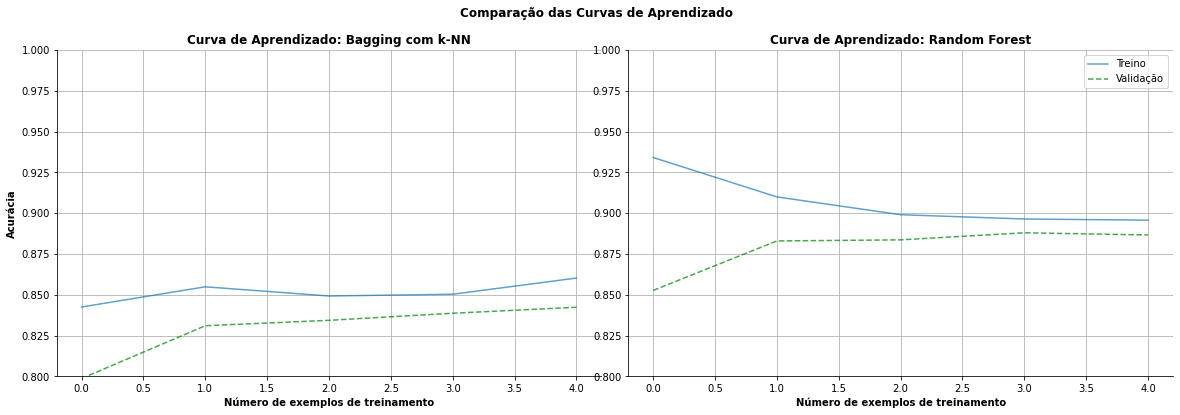

In [ ]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação das Curvas de Aprendizado', fontweight='bold')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Curva de aprendizado Bagging com k-NN
#=========================================
ax1.plot(acc_tkNN, alpha=0.7)         #Treino
ax1.plot(acc_vkNN, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax1.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax1.set_ylabel('Acurácia', fontweight='bold')
ax1.set_title('Curva de Aprendizado: Bagging com k-NN', fontweight='bold')
ax1.set_ylim(0.8, 1.0)

#Grid acrescentado para facilitar a análise visual da curva
ax1.grid()


#Curva de aprendizado Random Forest
#=========================================
ax2.plot(acc_tRndF, alpha=0.7)         #Treino
ax2.plot(acc_vRndF, 'g--', alpha=0.7)  #Validação

#Rótulos e legendas dos gráficos
ax2.legend(['Treino', 'Validação'], loc='upper right')
ax2.set_xlabel('Número de exemplos de treinamento', fontweight='bold')
ax2.set_title('Curva de Aprendizado: Random Forest', fontweight='bold')
ax2.set_ylim(0.8, 1.0)

#Grid acrescentado para facilitar a análise visual da curva
ax2.grid()

#Distância dos gráficos ajustada de propósito facilitar comparação
plt.subplots_adjust(wspace=0.05)

#Ajustes visuais finais
#=========================================
sns.despine()
plt.savefig('target/plot1.2.png')

Diferentemente do que foi visto nos modelos avaliados na abordagem **boosting**, os modelos treinados e submetidos ao conjunto de validação nessa seção apresentaram resultados razoavelmente distintos na comparação da curva de aprendizado. Nota-se que no modelo k-NN chega-se no máximo até 0.86 de acurácia$^1$, enquanto no modelo Random Forest já inicia-se próximo de 0.85 e há situações de acurácia acima de 0.92 no nível máximo (início das rodadas no conjunto de treino).

* **Modelo k-NN**: há uma pequena redução no início, seguido de aumento contínuo da acurácia na aplicação no conjunto de treino. Além disso, permance sempre em um patamar maior na métrica em comparação com o conjunto de validação. Apesar disso, à medida que o número de exemplos aumento há uma tendência predominante que melhoria da acurácia no conjunto de validação.
* **Modelo Random Forest**: o conjunto de treinamento cai o nível de acurácia à medida que o número de exemplos aumenta, enquanto no conjunto de validação a acurácia aumenta junto com o número de exemplos, exceto por um momento de queda suave aproximadamente no meio do número de exemplos. Além disso, ambos parecem convergir ao longo do tempo, diminuindo o *gap* ao longo do tempo.

(1) OS RESULTADOS PODEM MUDAR EM NOVAS RODADAS EM FUNÇÃO DE USO DE SELEÇÃO ALEATÓRIA EM ALGUMAS PARTES DAS EXECUÇÕES. ISSO É MINIZADO PELO USO DO PARÂMETRO `random_state`, MAS NÃO É ELIMINADO COMPLETAMENTE.

**PREDIÇÃO E AVALIAÇÃO DOS MODELOS**

* **Classificador Bagging baseado em k-NN**

In [ ]:
#Bagging baseado em k-NN
#=================================================

#Predição de valores com o modelo
y_pred_bgKNN = bgKNN_clf.predict(X_test)

#Visualização dos primeiros registros previstos
y_pred_bgKNN[:5]

array([0, 0, 0, 1, 0])

In [ ]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_bgKNN))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       306
           1       0.95      0.77      0.85       271

    accuracy                           0.87       577
   macro avg       0.89      0.87      0.87       577
weighted avg       0.88      0.87      0.87       577



* **Classificador Bagging Random Forest**

In [ ]:
#Random Forest
#=================================================

#Predição de valores com o modelo
y_pred_bgRndF = bgRndF_clf.predict(X_test)

#Visualização dos primeiros registros previstos
y_pred_bgRndF[:5]

array([0, 1, 1, 1, 0])

In [ ]:
#Avaliação do modelo
print(classification_report(y_test, y_pred_bgRndF))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       306
           1       0.96      0.81      0.88       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.90      0.89      0.89       577



Pelas métricas apresentadas no relatório de classificação das células anteriores, pode-se realizar a análise detalhada dos modelos da aplicação dos modelos no conjunto de testes. O **Random Forest** tem números ligeiramente superiores na maioria das métricas avaliadas, por exemplo apresentado acurácia de 0.89 contra 0.87 do **Bagging com k-NN** e precisão para classe positiva (1 = cliente pagaria a dívida) com valores foram 0.96 e 0.95 para **Random Forest e k-NN**, respectivamente. **Esta análise levaria praticamente a uma indefinição entre os modelos ou à escolha do *Random Forest* como preditor na comparação dessa seção** pela sua pequena superioridade nas métricas, mas experimentos em conjuntos de dados maiores e com sintonização de hiperparamentos poderia mudar essa análise dada a proximidade dos valores das métricas.

#2 Sistemas de Recomendação

##Análise preliminar dos dados

* Carga dos dados e organização das variáveis para uso nos algoritmos de recomendação.

In [ ]:
#Dados das matrizes R e Y
#Carga
arquivo = 'data/ex8_movies.mat'

data = spio.loadmat(arquivo,
                    squeeze_me=True)

#Verificação do conteúdo
data

{'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0'}

In [ ]:
#R => Matriz com informações sobre realização de classificações
#=====================================================================
#R(i; j) = 1 se o usuário j forneceu uma classificação para o filme i
#e R(i; j) = 0 em caso contráario.

#Carga dos dados em matriz lógica
#R = np.array(data['R'])
R = data['R'].astype(bool)

#Conferência das dimensões
R.shape

(1682, 943)

In [ ]:
R[:5]

array([[ True,  True, False, ...,  True, False, False],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [ ]:
#Y => Matriz com classificações feitas pelos usuários
#=====================================================

#Carga dos dados em uma matriz numpy
#Y = np.array(data['Y'])
Y = data['Y']

#Conferência das dimensões
Y.shape

(1682, 943)

In [ ]:
Y[:5]

array([[5, 4, 0, ..., 5, 0, 0],
       [3, 0, 0, ..., 0, 0, 5],
       [4, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
#Dados das matrizes X e Theta
arquivo = 'data/ex8_movieParams.mat'

#Carga
data_XT = spio.loadmat(arquivo,
                    squeeze_me=True)

#Verificação do conteúdo
data_XT

{'Theta': array([[ 0.28544362, -1.68426509,  0.26293877, ...,  0.76723235,
         -1.10460164, -0.25186708],
        [ 0.50501321, -0.45464846,  0.31746244, ...,  1.09306336,
         -1.20029436, -0.39161676],
        [-0.43191656, -0.47880449,  0.84671111, ...,  1.36333976,
         -0.32523542, -0.19468212],
        ...,
        [ 1.0586926 , -0.8087176 ,  0.56935771, ...,  0.80421422,
         -0.74346778, -0.11985885],
        [ 0.89058932, -0.12894734,  0.35560466, ...,  1.37426807,
         -0.7526549 , -0.81135311],
        [ 0.82414136, -0.38892594,  1.06940502, ...,  1.28423703,
         -0.98349993, -0.53184838]]),
 'X': array([[ 1.0486855 , -0.40023196,  1.19411945, ...,  0.861721  ,
         -0.69728994,  0.28874563],
        [ 0.78085123, -0.38562591,  0.52119779, ...,  0.70402073,
         -0.48583521, -0.56462407],
        [ 0.64150886, -0.54785385, -0.08379638, ...,  0.83854643,
         -0.69483208, -1.13479631],
        ...,
        [ 0.21952237, -0.20047886,  0.09

In [ ]:
#X => Matriz de características dos filmes
#=====================================================

#Carga dos dados em uma matriz numpy
#X = np.array(data_XT['X'])
X = data_XT['X']

#Conferência das dimensões
X.shape

(1682, 10)

In [ ]:
X[:5]

array([[ 1.0486855 , -0.40023196,  1.19411945,  0.37112768,  0.40760718,
         0.97440691, -0.05841025,  0.861721  , -0.69728994,  0.28874563],
       [ 0.78085123, -0.38562591,  0.52119779,  0.22735522,  0.57010888,
         0.64126447, -0.55000555,  0.70402073, -0.48583521, -0.56462407],
       [ 0.64150886, -0.54785385, -0.08379638, -0.59851928, -0.01769363,
         0.29973607, -0.72080697,  0.83854643, -0.69483208, -1.13479631],
       [ 0.45361782, -0.80021844,  0.68048129, -0.08174256,  0.13660098,
         0.90756058,  0.27768176,  0.3692999 , -1.26120762, -0.23558058],
       [ 0.93753789,  0.1060899 ,  0.36195295,  0.08664586,  0.28750514,
         0.51864396, -0.0568714 ,  0.91457268, -0.81933426, -0.54284661]])

In [ ]:
#Theta => Vetor de parâmetros theta para cada usuário
#=====================================================

#Carga dos dados em uma matriz numpy
#Theta = np.array(data_XT['Theta'])
Theta = data_XT['Theta']

#Conferência das dimensões
Theta.shape

(943, 10)

In [ ]:
Theta[0]

array([ 0.28544362, -1.68426509,  0.26293877, -0.28731731,  0.58572506,
        0.98018795, -0.06337453,  0.76723235, -1.10460164, -0.25186708])

* Com o conjunto de dados carregados nas variáveis de maneira adequada, podemos fazer uma primeira checagem dos conteúdos das avaliações antes de prosseguirmos com a implementações dos algoritmos de recomendação.

In [ ]:
print('Avaliação média para filme 50 (Star Wars): %f / 5' % np.mean(Y[49, R[49, :]]))

Avaliação média para filme 50 (Star Wars): 4.358491 / 5


In [ ]:
from matplotlib import use, cm

In [ ]:
!pip install tk

In [ ]:
use('TkAgg')

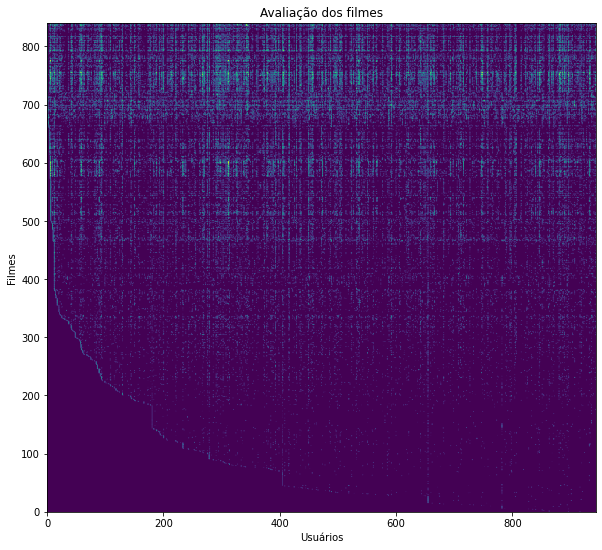

In [ ]:
#  É também possível ter uma perspectiva gráfica das avaliações com o comando imagesc
plt.figure(figsize=(10,9))

plt.imshow(Y, aspect='equal', origin='upper',
           extent=(0, Y.shape[1], 0, Y.shape[0]/2.0))

plt.title('Avaliação dos filmes')
plt.ylabel('Filmes')
plt.xlabel('Usuários')
plt.show()

Como o conjunto de dados original é extenso e muitos itens não tem avaliação, a visualização detalhada do gráfico acima pode não ter uma capacidade explicativa de detalhes, mas as cores correspondem ao nível da análise registrada. Na próxima etapa, retornaremos a esse gráfico para um subconjunto no qual é possível uma avaliação mais detalhada. Contudo, mesmo nesta visualização os valores mais escuros representam itens não avaliados o que já demonstra que a matriz é esparsa.

##2.1 Algoritmo de aprendizagem de filtragem colaborativa

A filtragem colaborativa é uma abordagem que busca identificar a similaridade entre os usuários, para que as recomendações levem em consideração os interesses atuais do usuário e a similaridade com interesses de outros usuários para recomendar novos itens [Grus, 2018].


<img src=https://upload.wikimedia.org/wikipedia/commons/5/52/Collaborative_filtering.gif width=450px>

**Figura 2 - Ilutração didática da filtragem colaborativa ([Wikipedia](https://en.wikipedia.org/wiki/Recommender_system))**

###2.1.1 Função de custo da filtragem colaborativa

In [ ]:
#Função implementa a função de custos da filtragem colaborativa
#Biblioteca personalizada com resposta para 2.1.1 e 2.1.2
from recsis.cofi_cost_func import cofi_cost_func

In [ ]:
#Carga de informações complementares do conjunto de dados
num_users = data_XT['num_users']
num_movies = data_XT['num_movies']
num_features = data_XT['num_features']

print(f'Usuários: {num_users}\nFilmes: {num_movies}\nAtributos: {num_features}')

Usuários: 943
Filmes: 1682
Atributos: 10


In [ ]:
#Reduz o conjunto de dados para que a execucao seja mais rapida
num_users = 4
num_movies = 5
num_features = 3
X = X[:num_movies, :num_features]
Theta = Theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]

In [ ]:
#Dimensões das matrizes do subconjunto de dados
print('Dimensões das matrizes X, Theta, Y e R:')
print(X.shape, Theta.shape, Y.shape, R.shape)

Dimensões das matrizes X, Theta, Y e R:
(5, 3) (4, 3) (5, 4) (5, 4)


Geração da visualização da matriz com a avaliação dos filmes para o conjunto de dados menor menor. Como foi comentado no análise preliminar dos dados, neste subconjunto já é mais fácil a visualização, mas ainda pode ser percebido (pelos valores mais escuros) que há muitas situações de itens (filmes) não avaliados.

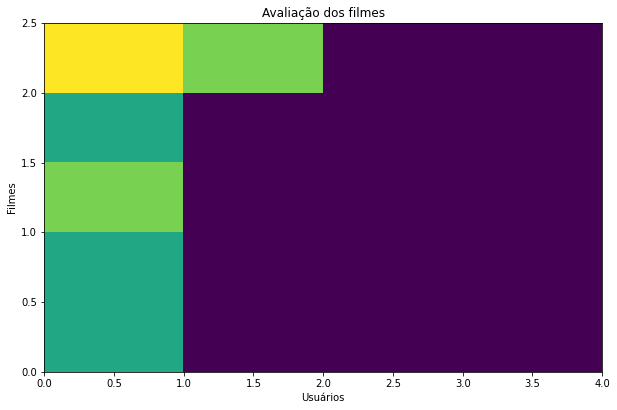

In [ ]:
#Perspectiva gráfica das avaliações do subconjunto criado
plt.figure(figsize=(10,9))

plt.imshow(Y, aspect='equal', origin='upper',
           extent=(0, Y.shape[1], 0, Y.shape[0]/2.0))

plt.title('Avaliação dos filmes')
plt.ylabel('Filmes')
plt.xlabel('Usuários')
plt.show()

A célula a seguir apresenta o cálculo do custo usando a função implementada em `cofi_cost_func`. O valor de custo calculado está dentro do valor esperado para o conjunto de dados, conforme pode ser visto na saída da célula.

* Este cáclulo segue a equação a seguir:

$
J(x^{(i)}, ..., x^{(n_m)}, \theta^{(1)}, ..., \theta^{(n_u)}) = \frac{1}{2} \displaystyle\sum_{(i,j):r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2
$



In [ ]:
#  Avaliacao da funcao de custo
J, grad = cofi_cost_func(np.hstack((X.T.flatten(),
                                    Theta.T.flatten())),
                         Y, R, num_users, num_movies,
                         num_features, 0)

In [ ]:
print(f'Custo computado usando parâmetros pré-treinados: {J:.2f} \n(valor deve ser próximo de 22.22)')

Custo computado usando parâmetros pré-treinados: 22.22 
(valor deve ser próximo de 22.22)


###2.1.2 Gradiente de filtragem colaborativa

A mesma função `cofi_cost_func` implementada na seção 2.1.1 realiza o cáclulo do gradiente da filtragem colaborativa, usando as equações das derivadas parciais fornecidas na seção 2.1.2 desse trabalho.

* Equação para cálculo do `X_grad`:

$
\frac{\partial J}{\partial x_k^{(i)}} = \displaystyle\sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})\theta_k^{(j)}
$


* Equação para cálculo do `Theta_grad`:

$
\frac{\partial J}{\partial \theta_k^{(j)}} = \displaystyle\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})\theta_k^{(j)}
$


Como na chamada da célula de código anterior, já foi usada a função com esta implementação, abaixo apenas apresentamos o vetor contendo o gradiente.

In [ ]:
#Exibição do vetor gradiente de filtragem colaborativa
grad

array([ -2.52899165,  -0.56819597,  -0.83240713,  -0.38358278,
        -0.80378006,   7.57570308,   3.35265031,   4.91163297,
         2.26333698,   4.74271842,  -1.89979026,  -0.52339845,
        -0.76677878,  -0.35334048,  -0.74040871, -10.5680202 ,
        -3.05099006,   0.        ,   0.        ,   4.62776019,
         1.16441367,   0.        ,   0.        ,  -7.16004443,
        -3.47410789,   0.        ,   0.        ])

A célula abaixo apenas reproduz a função de custo e gradiente para fins de conferência das etapas intermediárias, adicionando linhas para impressão na tela da checagens desejadas. A saída permite a checagem dimensões dos vetores `X_grad` e `Theta_grad` que devem ser equivalentes às matrizes X e Theta.

In [ ]:
def cofi_cost_func_(params, Y, R, num_users, num_movies, num_features, Lambda):

    # Obtem as matrizes X e Theta a partir dos params
    X = np.array(params[:num_movies*num_features]).reshape(num_features, num_movies).T.copy()
    Theta = np.array(params[num_movies*num_features:]).reshape(num_features, num_users).T.copy()


    # Voce deve retornar os seguintes valores corretamente
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    # ====================== SEU CODIGO AQUI ======================
    # Instrucoes: calcular a funcao de custo regularizada e gradiente
    # para a filtragem colaborativa. Concretamente, você deve primeiro
    # implementar a funcao de custo. Depois disso, voce deve implementar o
    # gradiente. 
    #
    # Notas: 
    # X - num_movies x num_features: matriz das caracteristicas dos filmes
    # Theta - num_users x num_features: matriz das caracteristicas dos usuarios
    # Y - num_movies x num_users: matriz de classificacoes de filmes por usuarios
    # R - num_movies x num_users: matriz, onde R (i, j) = 1 se o i-esimo filme
    #       foi avaliado pelo j-esimo usuario
    #
    # =============================================================

    # =============================================================
    #Função de custo baseada na equação da seção 2.1.1
    # =============================================================
    J = (1/2.) * np.sum((np.power(np.dot(X,Theta.T) - Y,2)) * R)

    # =======================================================================
    #Gradiente da filtragem colaborativa baseados nas equações da seção 2.1.2
    # =======================================================================

    # Gradiente para X e Theta:
    # =============================================================
    # X_grad - num_movies x num_features matrix, contendo as
    #   derivadas parciais com relacao a cada elemento de X
    X_grad = np.dot(( np.dot(X, Theta.T) - Y ) * R, Theta)
    print('CONFERÊNCIA - X_grad: valores e shape:')
    print(X_grad, X_grad.shape, sep='\n')

    # Theta_grad - num_users x num_features: matriz, contendo as
    #   derivadas parciais com relacao a cada elemento de Theta
    Theta_grad = np.dot((( np.dot(X, Theta.T) - Y ) * R).T, X)
    print('-'*50)
    print('CONFERÊNCIA - Theta_grad: valores e shape:')
    print(Theta_grad, Theta_grad.shape, sep='\n')

    # =============================================================
    #Gradiente para ambos os cojuntos em um único vetor
    # =============================================================
    grad = np.hstack((X_grad.T.flatten(),Theta_grad.T.flatten()))

    return J, grad

In [ ]:
#RODANDO NOVAMENTE APENAS PARA CONFERIR AS DIMENSÕES
#  Avaliacao da funcao de custo
_,  _ = cofi_cost_func_(np.hstack((X.T.flatten(),
                           Theta.T.flatten())),
                Y, R, num_users, num_movies,
                num_features, 0)

CONFERÊNCIA - X_grad: valores e shape:
[[-2.52899165  7.57570308 -1.89979026]
 [-0.56819597  3.35265031 -0.52339845]
 [-0.83240713  4.91163297 -0.76677878]
 [-0.38358278  2.26333698 -0.35334048]
 [-0.80378006  4.74271842 -0.74040871]]
(5, 3)
--------------------------------------------------
CONFERÊNCIA - Theta_grad: valores e shape:
[[-10.5680202    4.62776019  -7.16004443]
 [ -3.05099006   1.16441367  -3.47410789]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]
(4, 3)


A conferência demonstra que as dimensões (5,3) e (4,3) estão corretas, ou seja, correspondem às dimensões de X e Theta, respectivamente.

##2.2 Aprendizado de Recomendações para Filmes

**DEFINIÇÃO DE AVALIAÇÕES PARA UM NOVO USUÁRIO**

In [ ]:
#Função para carga da lista de filmes
from recsis.load_movie_list import load_movie_list

Antes de treinar o modelo de filtragem colaborativa, essa secao primeiro adiciona algumas avaliacoes que correspondem a um novo usuario. Essa parte do codigo ira tambem permitir que voce defina suas proprias avaliacoes para filmes
no conjunto de dados.

In [ ]:
#Carga dos dados dos filmes
movieList = load_movie_list()

In [ ]:
#A posição do filme na lista equivale à posição a ser usada para avaliação
movieList[:10]

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Twelve Monkeys (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'Richard III (1995)']

In [ ]:
#Inicia o vetor de avaliacoes do novo usuario
my_ratings = np.zeros(1682)

* **Definição de avaliação de alguns filmes da lista**

In [ ]:
#Toy Story (1995) tem ID 1; atribuir avaliação "3":
my_ratings[0] = 3

In [ ]:
#de Silence of the Lambs (1991); atribuir avaliação "5":
my_ratings[97] = 5

In [ ]:
# Abaixo, sao definidas as avaliacoes para outros filmes:
my_ratings[216] = 5 #Drácula
my_ratings[446] = 2 #Carrie
my_ratings[55] = 4 #Pulp Fiction
my_ratings[167] = 5 #Monty Python and the Holy Grail
my_ratings[262] = 3 #Steel
my_ratings[66] = 2 #Ace Ventura
my_ratings[796] = 2 #Timecop
my_ratings[203] = 5 #Back to the Future
my_ratings[49] = 5 #Star wars

In [ ]:
print('Avaliacoes do novo usuario:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))

Avaliacoes do novo usuario:
	Avaliou 3 para Toy Story (1995)
	Avaliou 5 para Star Wars (1977)
	Avaliou 4 para Pulp Fiction (1994)
	Avaliou 2 para Ace Ventura: Pet Detective (1994)
	Avaliou 5 para Silence of the Lambs, The (1991)
	Avaliou 5 para Monty Python and the Holy Grail (1974)
	Avaliou 5 para Back to the Future (1985)
	Avaliou 5 para Bram Stoker's Dracula (1992)
	Avaliou 3 para Steel (1997)
	Avaliou 2 para Carrie (1976)
	Avaliou 2 para Timecop (1994)


**APRENDIZADO DE RECOMENDAÇÕES PARA FILMES**

Treinamento do modelo usado o cojunto de dados completo com 1682 filmes e 943 usuários.

In [ ]:
#Função para normalizar avaliações
from recsis.normalize_ratings import normalize_ratings

#Função para minimizar o vetor theta
from scipy.optimize import minimize

* **Carga dos dados e definição das variáveis**

In [ ]:
#  Carga dos dados
data = spio.loadmat('data/ex8_movies.mat')
Y = data['Y']
R = data['R'].astype(bool)

#  Adiciona algumas avaliacoes a matriz
Y = np.column_stack((my_ratings, Y))
R = np.column_stack((my_ratings, R)).astype(bool)

In [ ]:
#  Normaliza avaliacoes originais
Ynorm, Ymean = normalize_ratings(Y, R)

* **Definição dos parâmetros para o treinamento do modelo**

In [ ]:
#Define quantidade de usários e filmes de acordo com as dimensões da matriz Y
num_users = Y.shape[1]
num_movies = Y.shape[0]

#Define o número de características
num_features = 10

In [ ]:
# Define parametros iniciais (Theta, X)
X = np.random.rand(num_movies, num_features)
Theta = np.random.rand(num_users, num_features)

initial_parameters = np.hstack((X.T.flatten(), Theta.T.flatten()))

# fator de regularizacao
Lambda = 10

Criação das configurações das funções de custo e gradiente, baseadas na função `cofi_cost_func` implementada nas seções 2.1.1 e 2.1.2 para realização do treinamento.

In [ ]:
costFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[0]
gradFunc = lambda p: cofi_cost_func(p, Ynorm, R, num_users, num_movies, num_features, Lambda)[1]

* **Treinamento do modelo**

Aplicação da função `minimize` para otimização do vetor *theta* e cálculo do custo.

In [ ]:
result = minimize(costFunc, initial_parameters, method='CG', jac=gradFunc,
                  options={'disp': True, 'maxiter': 1000.0})

theta = result.x
cost = result.fun

         Current function value: 21291.336038
         Iterations: 1000
         Function evaluations: 1499
         Gradient evaluations: 1499


In [ ]:
# Extrai as matrizes X e Theta a partir de theta
X = theta[:num_movies*num_features].reshape(num_movies, num_features)
Theta = theta[num_movies*num_features:].reshape(num_users, num_features)

* **Conferência dos valores gerados para $X$, $\theta$ e Custo**

In [ ]:
X[0]

array([0.5537076 , 0.76465443, 1.53491873, 0.62091359, 0.3664781 ,
       1.42825013, 0.53835537, 0.9272989 , 0.47459675, 0.1580864 ])

In [ ]:
Theta[0]

array([ 1.41278101,  0.15301972,  0.4002134 , -0.58928079, -0.00453182,
       -0.48958179, -0.22712605,  0.82903462,  0.57647719, -0.66244802])

In [ ]:
print(f'Custo computado no treinamento: {cost:.2f}')

Custo computado no treinamento: 21291.34


**REALIZAÇÃO DE RECOMENDAÇÕES**

* **Aplicação do modelo treinado para realizar recomendações de filmes**

In [ ]:
#Computacao da matriz de predicoes.
p = X.dot(Theta.T)
my_predictions = p[:, 0] + Ymean

In [ ]:
#Ordenação das predicoes em ordem decrescente
pre=np.array([[idx, p] for idx, p in enumerate(my_predictions)])
post = pre[pre[:,1].argsort()[::-1]]
r = post[:,1]
ix = post[:,0]

* **Visualização das principais recomendações ordenadas pela classificação dos filmes**

In [ ]:
print('\nRecomendacoes principais:')
for i in range(10):
    j = int(ix[i])
    print('\tPrevisão de avaliacao %.1f para %s' % (my_predictions[j], movieList[j]))


Recomendacoes principais:
	Previsão de avaliacao 13.3 para Strictly Ballroom (1992)
	Previsão de avaliacao 12.8 para Citizen Ruth (1996)
	Previsão de avaliacao 12.8 para Piano, The (1993)
	Previsão de avaliacao 11.6 para To Kill a Mockingbird (1962)
	Previsão de avaliacao 11.3 para Little Women (1994)
	Previsão de avaliacao 10.5 para Englishman Who Went Up a Hill, But Came Down a Mountain, The (1995)
	Previsão de avaliacao 10.1 para Nadja (1994)
	Previsão de avaliacao 10.1 para The Deadly Cure (1996)
	Previsão de avaliacao 9.9 para Romeo Is Bleeding (1993)
	Previsão de avaliacao 9.5 para Enchanted April (1991)


In [ ]:
print('\nAvaliacoes originais fornecidas:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('\tAvaliou %d para %s' % (my_ratings[i], movieList[i]))


Avaliacoes originais fornecidas:
	Avaliou 3 para Toy Story (1995)
	Avaliou 5 para Star Wars (1977)
	Avaliou 4 para Pulp Fiction (1994)
	Avaliou 2 para Ace Ventura: Pet Detective (1994)
	Avaliou 5 para Silence of the Lambs, The (1991)
	Avaliou 5 para Monty Python and the Holy Grail (1974)
	Avaliou 5 para Back to the Future (1985)
	Avaliou 5 para Bram Stoker's Dracula (1992)
	Avaliou 3 para Steel (1997)
	Avaliou 2 para Carrie (1976)
	Avaliou 2 para Timecop (1994)


#3 Redes Neurais Artificiais

As Redes Neurais Artificiais (RNA) foram introduzidas na década de 1940 pelos autores Warreng McCulloch e Walter Pitts que "apresentaram um modelo computacional simplificado utilizando lógica proposicional de como neurônios biológicos podem trabalhar juntos em cerebros de animais para realização de cálculos complexos" [Géron, 2019]. Os autores discutem características das atividades nervosas, eventos neurais e a lógica entre estes eventos. Também discutem aplicações dos cálculos sobre estas relações [McCulloch e Pitts, 1943].

As redes neurais artificiais atualmente são estudadas no contexto de aprendizado de máquina, uma subárea da inteligência artificial, como ilustra de maneira simplificada a Figura 3. O aprendizado profundo, por sua vez, "é uma subárea do aprendizado de máquina que investiga técnicas para simular o comportamento do cérebro humano em tarefas como reconhecimento de fala e processamento de linguagem natural” [Bezerra, 2016].



<img src=https://blogs.nvidia.com/wp-content/uploads/2016/07/Deep_Learning_Icons_R5_PNG.jpg.png width=550px>


**Figura 3: Relação entre inteligência artificial, aprendizado de máquina e aprendizado profundo - [NVIDIA](https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/)**

Uma RNA atua por representações hierárquicas dos dados de entrada e camadas de processamento sequencial, atuando como neurônios artificiais com conexões ponderadas por valores reais denominados como pesos [Bezerra, 2016]. A figura 4 ilustra a arquitetura básica de uma rede neural do tipo MLP (multilayer feed-forward neural network) que aprende iterativamente os pesos para predição. As entradas da rede correspondem às características de cada tupla dos dados de treinamento, os pesos são aprendidos e passados para camada oculta, as saídas da camada oculta são a entrada de uma outra camada oculta e este processo continua por todas as camadas ocultas até que as saída da camada oculta são entregues à camada de saída que realiza a predição da rede neural [Han et al, 2012]

![](https://ars.els-cdn.com/content/image/3-s2.0-B9780123814791000095-f09-02-9780123814791.jpg)

**Figura 4: Ilustração de uma RNA MLP (Multilayer feed-forward neural network) [Han et al, 2012]**


##3.1 Redes MLP

Nessa seção será realizada a criação de uma RNA MLP para classificação usando o mesmo conjunto de dados da seção 1. O conjunto de dados possui características de clientes e classe alvo binária em que 1 significa que o cliente pagará o crédito concedido, enquanto 0 significa que o cliente não realizará o pagamento. Para criação e treinamento será realizada inicialmente o uso do `PyTorch` para criação de uma versão da rede neural sem sintonização de hiperparâmetros, para compreensão do funcionamento da biblioteca. Em seguida será utilizada a biblioteca `Skorch` que habilita a integração entre `PyTorch` e `Scikit-Learn` para realização da sintonização de hiperparâmetros usando a técnica denominada *Grid Search*.

* **Carregando bibliotecas da seção**

OBSERVAÇÃO: Algumas bibliotecas estão sendo recarregadas aqui para permitir a realização dos experimentos da seção de modo separado do restante desse notebook.

In [ ]:
##============================================
##Preparação do Ambiente
##============================================

#Bibliotecas para carga e tratamento
import pandas as pd
import numpy as np


#Importações do PyTorch para criação de modelos e preparação de variáveis
import torch
from torch.autograd import Variable


#Biblioteca para cálculo das métricas de avaliação e tratamento dos datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Importações do PyTorch para criação da Rede Neural
import torch.nn as nn
import torch.nn.functional as F

###3.1.1 Carga e preparação dos dados

**PREPARAÇÃO DOS DADOS**

* **Recarga dos dados da seção 1 para o experimento**

Tendo em vista que serão usados os mesmos dados da seção 1, nas células abaixo apenas carregamos os dados novamente (para evitar problemas com nomes de variáveis similares usados ao longo dos experimentos desse notebook) e realizamos as transformações necessárias, sem repetição detalhada das análises preliminares.

In [ ]:
#Definção dos títulos das colunas
headers = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC',
           'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']


#Carga do conjunto de treino
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtrain.txt'
data_train = pd.read_csv(arquivo, sep='\t', header=None, names=headers)


#Carga do conjunto de teste
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t3/datasets/credtest.txt'
data_test = pd.read_csv(arquivo, sep='\t', header=None, names=headers)

In [ ]:
#Checagem rápida de parte dos dados carregados
print(data_train.head(),
      data_test.head(),
      sep='\n\n')

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     1     0    360      0   313  ...    0     25     48        0       1
1     0     0    350      1   468  ...    0     33      6        0       1
2     0     0   1100      0   829  ...    0     56     48        0       1
3     0     0   3000      0   552  ...    1     31     60        0       1
4     1     0   1000      0   809  ...    0     24      7        0       1

[5 rows x 12 columns]

   ESCT  NDEP  RENDA  TIPOR  VBEM  ...  TEL  IDADE  RESMS  ENTRADA  CLASSE
0     0     2    500      1   618  ...    0     36      6        0       0
1     1     0    813      0   552  ...    0     43     48      119       1
2     3     0    350      0   488  ...    0     43      0        0       1
3     1     0   1530      0   381  ...    0     28     48        0       1
4     0     0    688      1   396  ...    0     49     72        0       1

[5 rows x 12 columns]


* **Transformação de variáveis *dummies* para dados categóricos nominais**

In [ ]:
#Verificação do resumo estatístico dos dados
data_train.describe()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.512000,0.126667,984.51200,0.445333,562.031333,8.392667,102.247333,0.134000,41.210667,31.528667,32.255333,0.476667
std,0.659909,0.572865,905.53292,0.497168,265.690646,3.609131,62.987325,0.340766,13.202266,52.662099,94.307614,0.499622
min,0.000000,0.000000,300.00000,0.000000,300.000000,1.000000,50.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,467.50000,0.000000,410.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,650.00000,0.000000,490.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1200.00000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,8000.00000,1.000000,4000.000000,24.000000,711.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


In [ ]:
#Conferência de valores da variável Estado Civil (ESCT)
print(data_train['ESCT'].head(5),
      data_train['ESCT'].describe(),
      sep='\n\n')

#Conferência dos valores possíveis da variável
print('\nValores possíveis do atributo estado civil:')
set(data_train['ESCT'])

0    1
1    0
2    0
3    0
4    1
Name: ESCT, dtype: int64

count    1500.000000
mean        0.512000
std         0.659909
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: ESCT, dtype: float64

Valores possíveis do atributo estado civil:


{0, 1, 2, 3}

Percebemos pela análise simplificada que as opções de valores para estado cívil estão registradas na base de dados como os valores 0, 1, 2 e 3. Para criação de variáveis *dummies* serão criadas $n-1$ variáveis binárias, onde $n$ é o número de categorias. Isso é feito porque a categoria $n$ ocorrerá quanto todas as demais tiverem valor 0 e, portanto, não precisa ser mapeada.

---

Para criar as variáveis usamos o método denominado `get_dummies` da biblioteca `pandas` que simplifica esta transformação. Aplicaremos abaixo o método no conjunto de dados.

In [ ]:
#Usando a lógica estuda para recarregar os dados e refazer a separação
data_train_ = pd.get_dummies(data=data_train,
               prefix='ESCT',
               columns=['ESCT'],
               drop_first=True)

data_train_.head()

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,0,360,0,313,9,52,0,25,48,0,1,1,0,0
1,0,350,1,468,10,65,0,33,6,0,1,0,0,0
2,0,1100,0,829,9,125,0,56,48,0,1,0,0,0
3,0,3000,0,552,12,76,1,31,60,0,1,0,0,0
4,0,1000,0,809,12,111,0,24,7,0,1,1,0,0


In [ ]:
#Usando a lógica estuda para recarregar os dados e refazer a separação
data_test_ = pd.get_dummies(data=data_test,
               prefix='ESCT',
               columns=['ESCT'],
               drop_first=True)

data_test_.head()

,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE,ESCT_1,ESCT_2,ESCT_3
0,2,500,1,618,10,85,0,36,6,0,0,0,0,0
1,0,813,0,552,4,119,0,43,48,119,1,1,0,0
2,0,350,0,488,12,66,0,43,0,0,1,0,0,1
3,0,1530,0,381,1,398,0,28,48,0,1,1,0,0
4,0,688,1,396,10,60,0,49,72,0,1,0,0,0


Com a transformação realizada, serão separadas os atributos e classes alvos em novas variáveis para processamento pelos algoritmos desejados.

In [ ]:
#Separação da variável alvo não muda
##=======================================

#Transoformação dos atributos e da classe alvo em matrizes
y_train_ = np.array(data_train['CLASSE'])

#Transformação dos atributos e da classe alvo em matrizes
y_test = np.array(data_test['CLASSE'])

#Checagem rápida
print(y_train_[:10],
      y_test[:10],
      sep='\n\n')

[1 1 1 1 1 1 0 1 0 1]

[0 1 1 1 1 0 0 1 0 1]


In [ ]:
#Separação dos atributos precisa atentar que a ordem das colunas mudou
##=============================================================================

#Recuperação dos nomes das colunas
atributos = list(data_train_.columns)

#Eliminação da colunas com a classe na lista de atributos
atributos.remove('CLASSE')

In [ ]:
#Uso da lista de atributos para separação do conjunto de dados

#Transoformação dos atributos e da classe alvo em matrizes
X_train_ = np.array(data_train_.loc[:, atributos])

#Transformação dos atributos e da classe alvo em matrizes
X_test = np.array(data_test_.loc[:, atributos])

In [ ]:
#Separação de treino e validação não muda
##=======================================

#Separação de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_,
                                                  train_size=0.8,
                                                  random_state=31)

#Checagem das dimensões dos conjuntos após separação
print(X_train.shape, y_train.shape,
      X_val.shape, y_val.shape)

(1200, 13) (1200,) (300, 13) (300,)


In [ ]:
#Checagem rápida de parte dos dados carregados
print(X_train[:5],
      X_val[:5],
      X_test[:5],
      sep='\n\n')

[[   0  649    1  311    2   69    1   40    0  190    1    0    0]
 [   0  610    0  365    5   61    0   62   48   61    0    0    0]
 [   0 1500    0 1099    2  334    0   58    0  438    0    0    0]
 [   0 1000    0  471    3  176    1   45  240    0    1    0    0]
 [   0  322    1  469   10   72    1   40    0    0    0    0    0]]

[[   0  300    1  629   12   55    1   54   60  230    0    0    0]
 [   0  600    1  540   12   73    0   28    6    0    1    0    0]
 [   0  317    1  459   12   63    1   57  264    0    0    0    0]
 [   0  800    0  399    3  149    1   57    0    0    0    0    0]
 [   0 3000    0  360    1  376    0   43   48    0    1    0    0]]

[[   2  500    1  618   10   85    0   36    6    0    0    0    0]
 [   0  813    0  552    4  119    0   43   48  119    1    0    0]
 [   0  350    0  488   12   66    0   43    0    0    0    0    1]
 [   0 1530    0  381    1  398    0   28   48    0    1    0    0]
 [   0  688    1  396   10   60    0   49   

* **Normalização das caracterísitcas**

Como pode ser vistos nas saídas do final da seção as características estão em ordens de grandeza diferentes. Para muitos algoritmos este é um problema que pode levar a modelos inadequados. Para resolver este problema realizaremos a normalização dos dados.

In [ ]:
#Criação do transformador para noramlização
norm = StandardScaler()

#Normalização das características
X_train_ = norm.fit_transform(X_train_)
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)
X_val = norm.fit_transform(X_val)

* **Transformação dos dados originais em tensores**

Tendo em vista que o PyTorch não trabalha com variáveis comuns do Python, antes de iniciar a criação e treinamento da rede MLP as variáveis acima serão convertidas em tensores.

In [ ]:
#Conjunto de treino original
X_train_ = Variable(torch.Tensor(X_train_).float())
y_train_ = Variable(torch.Tensor(y_train_).long())

#Atributos de treino e validação
X_train = Variable(torch.Tensor(X_train).float())
X_val = Variable(torch.Tensor(X_val).float())

#Classes de treino e validação
y_train = Variable(torch.Tensor(y_train).long())
y_val = Variable(torch.Tensor(y_val).long())

#Atributos e classes de teste
X_test = Variable(torch.Tensor(X_test).float())
y_test = Variable(torch.Tensor(y_test).long())

In [ ]:
#Checagem rápida dos dados carregados após transformações e carga em tensores
print(X_train[:5],
      X_val[:5],
      X_test[:5],
      y_train[:5],
      y_val[:5],
      y_test[:5],
      sep='\n\n')

tensor([[-0.2257, -0.3653,  1.0871, -1.0437, -1.7619, -0.5321,  2.6159, -0.1014,
         -0.5868,  1.6098,  1.2205, -0.1398, -0.1546],
        [-0.2257, -0.4116, -0.9199, -0.8172, -0.9354, -0.6606, -0.3823,  1.5753,
          0.3224,  0.2932, -0.8193, -0.1398, -0.1546],
        [-0.2257,  0.6453, -0.9199,  2.2612, -1.7619,  3.7251, -0.3823,  1.2704,
         -0.5868,  4.1410, -0.8193, -0.1398, -0.1546],
        [-0.2257,  0.0515, -0.9199, -0.3727, -1.4864,  1.1868,  2.6159,  0.2797,
          3.9596, -0.3294,  1.2205, -0.1398, -0.1546],
        [-0.2257, -0.7536,  1.0871, -0.3810,  0.4422, -0.4839,  2.6159, -0.1014,
         -0.5868, -0.3294, -0.8193, -0.1398, -0.1546]])

tensor([[-0.2032, -0.7134,  1.2419,  0.1646,  1.0275, -0.7261,  2.2913,  0.9835,
          0.5051,  2.5452, -0.8108, -0.1302, -0.1759],
        [-0.2032, -0.4445,  1.2419, -0.0869,  1.0275, -0.4524, -0.4364, -0.9440,
         -0.5332, -0.4139,  1.2333, -0.1302, -0.1759],
        [-0.2032, -0.6981,  1.2419, -0.3158,  

###3.1.2 Criação da Rede Neural MLP sem sintonização de hiperparâmetros

Conforme descrito no início dessa seção, o experimento será iniciado com a criação de uma rede neural MLP com os hiperparâmetros definidos de maneira arbitrária com uso da biblioteca `PyTorch`. As próximas células empreendem esta tarefa.

* **Criação da classe com arquitetura da rede neural MLP**

Em função da baixa complexidade dos dados, a rede criada possui uma camada oculta e usa a função `nn.Linear` nas camadas de entrada. A saída é tratada pela função `Sigmoid`, tendo em vista que a tarefa é uma classificação binária para predição do pagamento ou atraso do crédito concedido aos clientes. Como a saída da sigmoide é uma probabilidade para cada classe, posteriormente será feito o tratamento da saída para identificação da classe predita. No passo `foward` da rede foi usada a função `Relu`.

In [ ]:
class Net(nn.Module):
  # Define nn
  def __init__(self, dimX, nC, neur):
    """
    Definição da Redeu Neural
    Parametros:
    dimX int: Entradas na primeira camada (quantidade de atributos)
    nC int:  Neurônios de saída (quantidade de classes possíveis)
    neur int: Neurônios na camada oculta
    """
    super(Net, self).__init__()

    ##Camada oculta
    ##==============
    #Recebe neurônios = quantidade de atributos
    #Entrega quantidade de neurônios da camada oculta
    self.fc1 = nn.Linear(dimX, neur)

    ##Camada de saída
    ##==============
    #Recebe neurônios da camada oculta
    #Entrega quantidade de neurônios das classes possíveis
    self.fc2 = nn.Linear(neur, nC)

    #Uso da função Sigmoid para classificação binária
    self.output = nn.Sigmoid()

  def forward(self, X):
    """
    Definição do passo forward
    """
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.output(X)

    return X

* **Uso da classe para criação da rede neural**

In [ ]:
"""
Realizados ajustes manuais para definição dos hiperparâmetros. No final dessa
seção será usada técnica de sintonização de hiperparâmetros, mas primeiramente
será explorada a forma mais simples com estas defnições arbitrárias.
"""

##Parâmetros baseados nos conjuntos de dados
##============================================

#Quantidade de atributos do conjunto de dados
attr_N = X_train.shape[1]

#Quantidade de classes possíveis do conjunto de dados
out_Classes = 2


"""
Ajuste manual dos parâmetros: Início lr = 0.001, 100 neurônios na camada oculta
Mantido lr e alterado número de neurônios para 200
"""
##Parâmetros definidos arbitrariamente
##============================================
NUM_NEUR = 200 #Neurônios na camada oculta
NUM_EPOCHS = 1000 #Número de épocas
LEARNING_R = 0.001 #Taxa de aprendizagem


print('Qtde. Atributos de entrada:', attr_N,
      '\nQtde. Classes alvo:', out_Classes,
      '\nNeurônios na camada oculta:', NUM_NEUR,
      '\nNúmero de épocas:', NUM_EPOCHS,
      '\nTaxa de aprendizagem:', LEARNING_R)

Qtde. Atributos de entrada: 13 
Qtde. Classes alvo: 2 
Neurônios na camada oculta: 200 
Número de épocas: 1000 
Taxa de aprendizagem: 0.001


In [ ]:
#Criação do objeto com a classe da Rede Neural
net = Net(attr_N, out_Classes, NUM_NEUR)

#Arquitetura da Rede Neural
print('Arquitetura da Rede Neural:\n', net)

Arquitetura da Rede Neural:
 Net(
  (fc1): Linear(in_features=13, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=2, bias=True)
  (output): Sigmoid()
)


* **Função de Custo e Otimizador**

Como pode ser visto a seguir, foi usada entropia cruzada como função de custos, tendo em vista que a rede realiza um tarefa de classificação. Como otimizador foi usado o gradiente descendente.

In [ ]:
##Parâmetros baseados em algoritmos ou funções
##============================================

#Entropia cruzada como função de custo - Problema de classificação
criterion = nn.CrossEntropyLoss()

#Configuração do otimizador - SGD
optimizer = torch.optim.SGD(net.parameters(), lr = LEARNING_R)

**TREINAMENTO DA REDE NEURAL**

No treinamento é realizado um loop que itera pela quantidade de épocas definidas anteriormente. Em cada iteração é realizado o seguinte procedimento:
* Zerados os valores do otimizador;
* Realizada predição com a rede neural;
* Cáclulo do custo aplicado a função definida anteriormente;
* Realizada a retro propagação do erro na rede (backpropagation);
* Realizada otimização dos hiperparâmetros.

In [ ]:
##TREINAMENTO DA REDE NEURAL
##===============================

# loop to train the neural net
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    out = net(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('At epoch %d the loss is %f' % (epoch, loss.data.item()))

At epoch 0 the loss is 0.693437
At epoch 100 the loss is 0.692843
At epoch 200 the loss is 0.692225
At epoch 300 the loss is 0.691555
At epoch 400 the loss is 0.690862
At epoch 500 the loss is 0.690133
At epoch 600 the loss is 0.689382
At epoch 700 the loss is 0.688615
At epoch 800 the loss is 0.687846
At epoch 900 the loss is 0.687085


In [ ]:
#Verificação rápida da forma da saída da rede
out[:10]

tensor([[0.5000, 0.5236],
        [0.5000, 0.5031],
        [0.5000, 0.5000],
        [0.5000, 0.6327],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5661],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000]], grad_fn=<SliceBackward>)

**PREDIÇÃO E AVALIAÇÃO DA REDE NEURAL COM DADOS DE VALIDAÇÃO**

In [ ]:
#Realiza predições no conjunto de validação
#Cada predição é composto por um par (predição para cada classe)
predict_out = net(X_val)


#Recupera como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

In [ ]:
#Avaliação da Rede Neural nos dados de validação

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_val.data, predict_y.data))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_val.data, predict_y.data,
                            zero_division=0))

Matriz de confusão
[[ 71  78]
 [ 22 129]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.76      0.48      0.59       149
           1       0.62      0.85      0.72       151

    accuracy                           0.67       300
   macro avg       0.69      0.67      0.65       300
weighted avg       0.69      0.67      0.65       300



**APLICAÇÃO DA REDE NEURAL PARA PREDIÇÃO NOS DADOS DE TESTE**

In [ ]:
#Realiza predições no conjunto de testes
#Cada predição é composto por um par (predição para cada classe)
predict_out = net(X_test)


#Recupera como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

In [ ]:
#Avaliação da Rede Neural nos dados de teste

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_test.data, predict_y.data))


#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_test.data, predict_y.data,
                            zero_division=0))

Matriz de confusão
[[159 147]
 [ 35 236]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.82      0.52      0.64       306
           1       0.62      0.87      0.72       271

    accuracy                           0.68       577
   macro avg       0.72      0.70      0.68       577
weighted avg       0.72      0.68      0.68       577



Com a rede treinada, foram realizadas predições (visualizadas nas próximas células) e geradas as métricas de avaliação. Nota-se que os resultados nos conjuntos de validação e de testes são similares, com acurácia pouco acima de 70% e precisão para classe positiva (predição de clientes que pagam o crédito concedido) de 72% em ambos os conjuntos de dados.

In [ ]:
#Visualização dos valores da saída da rede neural
predict_out[:10]

tensor([[0.5000, 0.5101],
        [0.5000, 0.5337],
        [0.5000, 0.5572],
        [0.5000, 0.6673],
        [0.5000, 0.5000],
        [0.5000, 0.5051],
        [0.5000, 0.5114],
        [0.5000, 0.5000],
        [0.5000, 0.5029],
        [0.5000, 0.5713]], grad_fn=<SliceBackward>)

In [ ]:
#Visualização das classes preditas
predict_y[:10]

tensor([1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

###3.1.3 Criação da Rede Neural MLP com sintonização de hiperparâmetros


As etapas anteriores dessa seção realizaram uma versão simplificada da criação, treinamento e aplicação de uma rede MLP com definição arbitrária dos hiperparâmetros. A seguir utilizamos a técnica de *Grid Search* para sintonização de hiperparâmetros e obtenção de uma rede com parâmetros otimizados para busca de melhores resultados nas métricas de desempenho usadas na avaliação do modelo.

In [ ]:
#Instalação da biblioteca para integração da sintonização no Pythorch
!pip install skorch

#Biblioteca para adaptação sintonização de Hiperparâmetro ao Pytorch
from skorch import NeuralNetClassifier
#Biblioteca para sintonização de Hiperparâmetro
from sklearn.model_selection import GridSearchCV

* Definição dos parâmetros iniciais

A seguir são definidiso os parâmetros iniciais para criação da arquitetura da rede neural. Foi reduzido deliberadamente os valores do número de épocas de treinamento e números de neurônios na camada oculta, tanto nos parâmetros iniciais quanto nas opções para sintonização que será vista adiante. Esta decisão foi realizada em função do custo computacional para realização da sintonização, contudo, em uma situação real deve-se avaliar o custo x benefício e manter uma coerência na comparação entre diferentes abordagens para criação e treinamento dos modelos.

In [ ]:
##Parâmetros baseados nos conjuntos de dados
##============================================
#Quantidade de atributos do conjunto de dados
attr_N = X_train_.shape[1]

#Quantidade de classes possíveis do conjunto de dados
out_Classes = 2

##Parâmetros iniciais para sintonização
##============================================
NUM_NEUR = 100 #Neurônios na camada oculta
NUM_EPOCHS = 15 #Número de épocas
LEARNING_R = 0.001 #Taxa de aprendizagem


print('Qtde. Atributos de entrada:', attr_N,
      '\nQtde. Classes alvo:', out_Classes,
      '\nNeurônios na camada oculta:', NUM_NEUR,
      '\nNúmero de épocas:', NUM_EPOCHS,
      '\nTaxa de aprendizagem:', LEARNING_R)

Qtde. Atributos de entrada: 13 
Qtde. Classes alvo: 2 
Neurônios na camada oculta: 100 
Número de épocas: 15 
Taxa de aprendizagem: 0.001


A estrutura básica da rede neural foi mantida equivalente ao exemplo das etapas anteriores da seção de criação da rede sem sintonização de hiperparâmetros, exceto pela própria definição dos hiperparâmetros. Dessa forma, pode-se perceber o uso das mesmas funções nas etapas da rede neural, assim como a manutenção da função de custo e otimizador como entropia cruzada e gradiente descendente, respectivamente.

In [ ]:
##Criação da classe da Rede Neural
##============================================
class Net_(nn.Module):
  # Define nn
  #def __init__(self, neur):
  def __init__(self, dimX, nC, neur):
    """
    Definição da Redeu Neural
    Parametros:
    dimX int: Entradas na primeira camada (quantidade de atributos)
    nC int:  Neurônios de saída (quantidade de classes possíveis)
    neur int: Neurônios na camada oculta
    """
    super(Net_, self).__init__()

    ##Camada oculta
    ##==============
    #Recebe neurônios = quantidade de atributos
    #Entrega quantidade de neurônios da camada oculta
    self.fc1 = nn.Linear(dimX, neur)

    ##Camada de saída
    ##==============
    #Recebe neurônios da camada oculta
    #Entrega quantidade de neurônios das classes possíveis
    self.fc2 = nn.Linear(neur, nC)

    #Uso da função Sigmoid para classificação binária
    self.output = nn.Sigmoid()

  def forward(self, X):
    """
    Definição do passo forward
    """
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.output(X)

    return X

* **Criação do objeto para sintonização usando a classe da rede neural**

Para integração do `PyTorch` com o `Scikit-Learn` para permitir a sintonização de hiperâmetros foi necessário o uso da biblioteca `Skorch`. Para usso desta biblioteca, a rede é criada em um `wraper` que recebe a classe da rede neural e demais parâmetros que devem ser usados para treinamento ou sintonização. As linhas de ajuda comentadas na célula a seguir permitem o acesso à documentação que é complementada pelos documentos listados na seção de Referências desse trabalho.

Após análise da documentação da `Skorch` a configuração de criação da rede e definição das opções de hiperparâmetros para sintonização apresentados nas células a seguir foi a que mais se aproximou da reprodução da criação manual da rede neural artificial empreendida na seção anterior.

In [ ]:
##Criação arquitetura inicial da Rede Neural
##============================================

#help(skorch.NeuralNet.fit)
#help(NeuralNetClassifier)

netGS = NeuralNetClassifier(
    Net_, #Rede neural
    module__dimX=attr_N, #Quantidade de atributos
    module__nC=out_Classes, #Quantidade de classes possíveis
    max_epochs=NUM_EPOCHS, #Número de épocas
    lr=LEARNING_R, #Taxa de aprendizagem
    criterion=nn.CrossEntropyLoss, #Função de custos
    optimizer = torch.optim.SGD, #Uso do SGD para otimização (PADRÃO)
    iterator_train__shuffle=True, #Separação aleatória de treino e validação
    verbose=0, #Oculta progresso do treinamento. 1 habilita visualização na tela
    )

In [ ]:
##Opções de parâmetros para sintonização
##============================================
"""
#Parâmetros para teste simplificado da sintonização
params = {
    'lr': [0.1, 0.001], #Taxa de aprendizado
    'max_epochs': [10, 20], #Número de épocas
    'module__neur': [50, 100], #Neurônios na camada oculta
}
"""
#Parâmetros para sintonização mais detalhada
params = {
    'lr': [0.1, 0.01, 0.001], #Taxa de aprendizado
    'max_epochs': [10, 20, 100, 500], #Número de épocas
    'module__neur': [100, 150, 200] #Neurônios na camada oculta
}

* **Realização da sintonização de hiperparâmetros**

Com a arquitetura base da rede criada e as opções de parâmetros para análise, é criado um objeto `GridSearch` com a forma de uso normal da biblioteca `Scikit-Learn`, conforme pode ser visto na próxima célula. Em seguida é usado o método `.fit` para realizar a sintonização própriamente dita. Note que o uso do parâmetro `refit=True` permite que o próprio objeto `GridSearch` seja usado como a rede neural treinada, podendo ser usado para realizar predições ou armazenado em disco para posterior utilização.

In [ ]:
##Criação do objeto para sintonização de hiperparâmetros
##=======================================================
gs = GridSearchCV(netGS,
                  params,
                  refit=True,
                  cv=3,
                  scoring='accuracy'
                  )

Durante a realização da sintonização é possível acompanhar as saídas a cada época treinada, mas isso foi desativado neste experimento tendo em vista que dependendo da configuração de parâmetros a serem testados a saída textual pode conter centenas ou milhares de linhas. De qualquer modo, no processo de experimentação na prática é importante a manutenção destas saídas para melhor avaliação pelo pesquisador. Para ilustrar esta etapa do processo foi mantida uma versão com a ativação das saídas detalhadas no repositório disponível em https://github.com/janiosl/python.ds/blob/master/ml/PyTorch/ML_nnMLP.ipynb .

In [ ]:
##Criação do objeto para sintonização de hiperparâmetros
##ATENÇÃO: PROCESSO LENTO DEPENDENDO DAS OPÇÕES PARA SINTONIZAÇÃO
##===============================================================

print('Rede neural artifical sendo treinada. Aguardade...')
print('Para acompanhar o progresso a cada época habilitar\nsaídas no parâmetro `verbose`')
print('=' * 60, end='\n\n')

#Treinamento da rede
gs.fit(X_train_, y_train_)

Rede neural artifical sendo treinanda. Aguardade...
Para acompanhar o progresso a cada época habilitar
saídas no parâmetro `verbose`



GridSearchCV(cv=3, error_score=nan,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.Net_'>,
  module__dimX=13,
  module__nC=2,
),
             iid='deprecated', n_jobs=None,
             param_grid={'lr': [0.1, 0.01, 0.001],
                         'max_epochs': [10, 20, 100, 500],
                         'module__neur': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

* **Conferência do resultado da sintonização**

Após a conclusão do processo, as configurações do experimento são apresentada na forma de relatório (conforme saída anterior) e os resultados armazenados em atributos do objeto usado na sintonização. Abaixo visualizamos a pontuação da acurácia (métrica usada para sintonização), bem como os parâmetros do melhor modelo selecionado na sintonização.


In [ ]:
#Visualização dos parâmetros sintonizados
##============================================
print(f'Score: {gs.best_score_:.3f}\nParâmetros:\n{gs.best_params_}')

Score: 0.896
Parâmetros:
{'lr': 0.1, 'max_epochs': 500, 'module__neur': 100}


Os valores dos parâmetros podem ser usados para construção da rede neural, de forma similar ao uso do `Grid Search` com outros tipos de algoritmos de aprendizado de máquina. Também é possível a utilização do próprio objeto como a rede neural treinada, tendo em vista que o argumento `refit` foi mantido ativado antes da sintonização.

A próxima célula demonstra a aplicação da rede neural treinada com os parâmetros sintonizados para realização de predições no conjunto de testes e posterior avaliação do desempenho do modelo.

In [ ]:
##Aplicação direta do modelo sintonizado
##============================================
"""
Predição e avaliação no conjunto de validação
###NÃO USAR SE A SITONIZAÇÃO FOR FEITA NO CONJUNTO COMPLETO
y_pred = gs.predict(X_val)

#Avaliação da Rede Neural nos dados de teste

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_val.data, y_pred))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_val.data, y_pred,
                            zero_division=0))
"""
#Predição no conjunto de testes
y_pred = gs.predict(X_test)

#Avaliação Final da Rede Neural nos dados de teste

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_test.data, y_pred))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_test.data, y_pred,
                            zero_division=0))

Matriz de confusão
[[301   5]
 [ 49 222]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       306
           1       0.98      0.82      0.89       271

    accuracy                           0.91       577
   macro avg       0.92      0.90      0.90       577
weighted avg       0.92      0.91      0.91       577



Como pode-se perceber a rede neural criada com a sintonização de hiperparâmetros apresenta resultados superiores àquela criada na seção anterior com a definição arbitrária de hiperparâmetros. A acurácia por exemplo subiu de 68% para 91% e a precisão para a classe positiva subiu de 62% para 98%, além disso o F1-Score que analisa em conjunto a precisão e revocação aumento de 72% para 89%. Esta análise isolada não pode determinar definitivamente a qualidade da rede, uma vez que pode ainda existir sobreajustamento. Mas a diferença nos resultados, associada ao fato da sintonização ter sido feita com poucas opções para reduzir o tempo de execução e facilitar a análise didática do experimento, já são um indício relevante da vantagem da realização da sintonização na criação e treinamento de redes neurais artificiais.

* **Uso dos parâmetros sintonizados para criação de uma nova RNA**

Os parâmetros sintonizados com o *Grid Search* podem ser usados para criação de uma nova rede neural, usando a classe criada no início dessa seção. Isso permite um melhor controle das etapas, tendo em vista uma parte relativamente oculta na realização do treinamento da rede usando os passos realizados até esse ponto dessa seção, cujo entendimento detalhado requer a leitura atenta da documentação das bibliotecas `Skorch` e da função `GridSerachCV`. Por outro lado, a criação manual e novo treinamento requer etapas adicionais e deixar de reaproveitar todo o treinamento realizado para sintonização. De qualquer modo, para ilustrar ambas abordagens, a seguir é criada uma nova rede e treinada com os hiperparâmetros selecionados na sintonização.

In [ ]:
##Criação de um novo modelo com os parêmtros sintonizados
##======================================================

#Recuperação dos parâmetros
NUM_NEUR = gs.best_params_['module__neur']
NUM_EPOCHS = gs.best_params_['max_epochs']
LEARNING_R = gs.best_params_['lr']

#Criação do objeto com a classe da Rede Neural
net_ = Net_(attr_N, out_Classes, NUM_NEUR)

#Arquitetura da Rede Neural
print('Arquitetura da Rede Neural:\n', net_)

Arquitetura da Rede Neural:
 Net_(
  (fc1): Linear(in_features=13, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
  (output): Sigmoid()
)


In [ ]:
#Entropia cruzada como função de custo - Problema de classificação
criterion = nn.CrossEntropyLoss()

#Configuração do otimizador - SGD
optimizer = torch.optim.SGD(net_.parameters(), lr = LEARNING_R)

In [ ]:
##TREINAMENTO DA REDE NEURAL
##===============================
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    out = net_(X_train)
    loss = criterion(out, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % (NUM_EPOCHS/10) == 0:
        print('At epoch %d the loss is %f' % (epoch, loss.data.item()))

At epoch 0 the loss is 0.688198
At epoch 50 the loss is 0.660770
At epoch 100 the loss is 0.646405
At epoch 150 the loss is 0.636362
At epoch 200 the loss is 0.610302
At epoch 250 the loss is 0.588284
At epoch 300 the loss is 0.574448
At epoch 350 the loss is 0.565326
At epoch 400 the loss is 0.558829
At epoch 450 the loss is 0.553959


In [ ]:
#Realiza predições no conjunto de testes
#Cada predição é composto por um par (predição para cada classe)
predict_out = net_(X_test)


#Recupera como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

In [ ]:
#Avaliação da Rede Neural nos dados de teste

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_test.data, predict_y.data))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_test.data, predict_y.data,
                            zero_division=0))

Matriz de confusão
[[301   5]
 [ 59 212]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       306
           1       0.98      0.78      0.87       271

    accuracy                           0.89       577
   macro avg       0.91      0.88      0.89       577
weighted avg       0.90      0.89      0.89       577



O resultado das métricas foram ligeiramente inferiores à aplicação direta da rede criada e treinada na sintonização de hiperparâmetros em métricas como acurácia e F1-Score. Contudo, continuam bastante superiores à rede criada manual com hiperparâmetros definidos arbitrariamente.

* Acurácia foi de 68% para 89%;
* Precisão na classe positiva foi de 62% para 98%;
* F1-Score: aumento de 72% para 87%.

A célula a seguir apresenta as predições para os primeiros 10 exemplos do conjunto de dados de testes.

In [ ]:
#Visualização dos valores da saída da rede neural
predict_y[:10]

tensor([0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

* **Gravação do modelo para reaproveitamento**

Por fim, tendo em vista o custo computacional do processo de criação e treinamento de redes neurais, pode ser de grande valor o armazenamento de modelos treinados experimentos posteriores ou para uso prático na realização de predições. O código a seguir usa a biblioteca nativa do Python denominada `pickle` que permite o armazenamento e posterior utlização. A utilização deve ser feita usado o código inativo (comentado) e passando como argumento o nome do arquivo usado para armazenar o modelo. É relevante ressaltar que a própria documentação oficial do Python alerta para o risco de carregar arquivos com pickle de origem desconhecida, tendo em vista que a biblioteca não se limita a gravar este tipo de modelo, mas códigos com diferentes objetivos criados em Python.

Adicionalmente, foi disponibilizado um código com exemplo de reutilização do modelo treinado no repositório: https://github.com/janiosl/python.ds/blob/master/ml/PyTorch/ML_model_reuse.ipynb

In [ ]:
import pickle

In [ ]:
##Salvando modelo para uso posterior
##=====================================

#Definir como primeiro parâmetro de dump o nome do modelo desejado
#Salvando modelo sintonizado no Grid Search
with open('target/JANIO_T3_MLP_GS.pkl', 'wb') as f:
    pickle.dump(gs, f)
    
"""
#Reativar este trecho para carregar a rede treinada
with open('JANIO_T3_MLP_GS.pkl', 'rb') as f:
    model = pickle.load(f)
"""

print('Modelo salvo\nPara usar, basta reativar o código acima')

Modelo salvo
Para usar, basta reativar o código acima


##3.2 Redes Convolucionais

###3.2.1 Análise preliminar dos dados

* Carga dos dados

In [14]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [7]:
train_file = h5py.File('data/train_catvnoncat.h5', 'r')
test_file = h5py.File('data/test_catvnoncat.h5', 'r')

In [8]:
print('Dataset contains these objects: ', end = '')
for key in train_file.keys():
    print(key, end = ', ')

Dataset contains these objects: list_classes, train_set_x, train_set_y, 

In [9]:
# Load training data in numpy
X_train = np.array(train_file['train_set_x'][:])
y_train = np.array(train_file['train_set_y'][:])

# Load development data in numpy
X_test = np.array(test_file['test_set_x'][:])
y_test = np.array(test_file['test_set_y'][:])

* Análise do conteúdo e visualização de exemplos de imagens no conjunto de dados



Visualização de algumas imagens do dataset:
Dimensões de cada imagem: (64, 64, 3)
Temos 209 imagens de treinamento e 50 imagens de teste


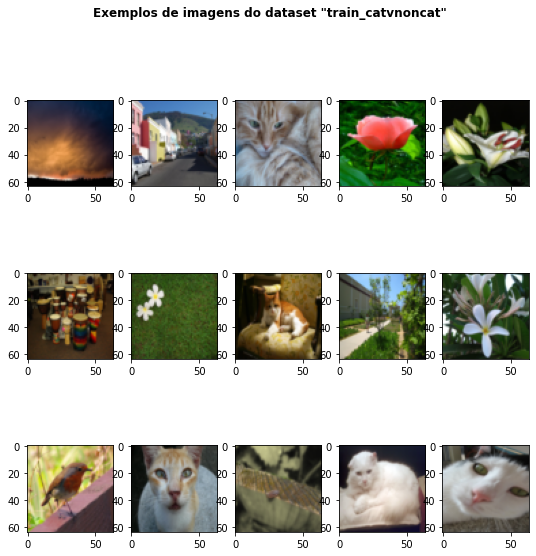

In [10]:
# Plot some of the example images
print('\n\nVisualização de algumas imagens do dataset:')
n_rows = 3
n_cols = 5

f, axarr = plt.subplots(n_rows, n_cols, figsize = (9,9))
idx = 0

for i in range(n_rows):
    for j in range(n_cols):
        axarr[i,j].imshow(X_train[idx])
        idx += 1
plt.suptitle('Exemplos de imagens do dataset "train_catvnoncat"', fontweight='bold')
plt.savefig('target/plot3.2.1.png')

print('Dimensões de cada imagem:', X_train[0].shape)
print(f'Temos {X_train.shape[0]} imagens de treinamento e {X_test.shape[0]} imagens de teste')

* Verificação complementar da dimensão dos conjuntos de dados

In [11]:
print(X_train.shape,
      y_train.shape,
      X_test.shape,
      y_test.shape, sep='\n')

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [12]:
X_train[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

###3.2.2 Criação da Rede Neural MLP para processamento de imagens

* Linearização dos dados das imagens

In [18]:
#Linearização para uso na MLP
X_trainMLP = X_train.reshape(X_train.shape[0], -1).astype(np.float32)
X_testMLP = X_test.reshape(X_test.shape[0], -1).astype(np.float32)

print(X_trainMLP.shape,
      X_testMLP.shape)

(209, 12288) (50, 12288)


* Normalização dos dados

In [19]:
#Criação do transformador para noramlização
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

#Normalização das características
X_trainMLP = norm.fit_transform(X_trainMLP)
X_testMLP = norm.fit_transform(X_testMLP)

* Conversão dos dados linearizados em tensores

In [20]:
from torch.autograd import Variable
from torch import Tensor

In [21]:
X_trainMLP = Variable(Tensor(X_trainMLP).float())
X_testMLP = Variable(Tensor(X_testMLP).float())
y_trainMLP = Variable(Tensor(y_train).long())
y_testMLP = Variable(Tensor(y_test).long())

In [22]:
#Conferência das dimensões da entrada na camada inicial da rede
X_trainMLP.shape[1]

12288

In [15]:
import torch
import torch.nn.functional as F

In [23]:
#Criação da Rede Neural Artificial MLP
class FcNet(torch.nn.Module):

  def __init__(self):
    super(FcNet, self).__init__()

    # 12288 => X_trainMLP.shape[1]
    self.fc1 = torch.nn.Linear(12288, 100)
    self.fc2 = torch.nn.Linear(100, 2)
    self.output = torch.nn.Softmax(dim=1)

  def forward(self, X):
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.output(X)

    return X

In [24]:
#Uso da classe para criação da rede
model = FcNet()

#Conferência da arquitetura da rede
print(model)

FcNet(
  (fc1): Linear(in_features=12288, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
  (output): Softmax(dim=1)
)


* Parâmetros adicionais para treinamento da rede (função de custo, otimizador e épocas)

In [26]:
# cross entropy loss is adequate for classification problems
criterion = torch.nn.CrossEntropyLoss()

# set the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

NUM_EPOCHS = 1000

* Treinamento da MLP

In [27]:
# loop to train the neural net
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    out = model(X_trainMLP)
    loss = criterion(out, y_trainMLP)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('At epoch %d the loss is %f' % (epoch, loss.data.item()))

At epoch 0 the loss is 0.696553
At epoch 100 the loss is 0.646676
At epoch 200 the loss is 0.601578
At epoch 300 the loss is 0.568108
At epoch 400 the loss is 0.543377
At epoch 500 the loss is 0.523365
At epoch 600 the loss is 0.505775
At epoch 700 the loss is 0.490400
At epoch 800 the loss is 0.476605
At epoch 900 the loss is 0.463795


In [28]:
#Realiza predições no conjunto de testes
#Cada predição é composto por um par (predição para cada classe)
predict_out = model(X_testMLP)


#Recupera como valor predito o maior de cada par predito
_, predict_y = torch.max(predict_out, 1)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
#Avaliação da Rede Neural nos dados de validação

#Matriz de confusão
print('Matriz de confusão')
print(confusion_matrix(y_testMLP.data, predict_y.data))

#Relatório de avaliação da classificação
print('-' * 60, end='\n\n')
print('Relatório de avaliação da classificação')
print(classification_report(y_testMLP.data, predict_y.data,
                            zero_division=0))

Matriz de confusão
[[13  4]
 [16 17]]
------------------------------------------------------------

Relatório de avaliação da classificação
              precision    recall  f1-score   support

           0       0.45      0.76      0.57        17
           1       0.81      0.52      0.63        33

    accuracy                           0.60        50
   macro avg       0.63      0.64      0.60        50
weighted avg       0.69      0.60      0.61        50



###3.2.3 Criação da Rede Neural Convolucional

#Referências

**Referências**

Bezerra, Eduardo (2016) **Introdução à Aprendizagem Profunda**. Disponível em: https://www.researchgate.net/publication/309321510_Introducao_a_Aprendizagem_Profunda, julho de 2020.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

Han, Jiawei. Kamber, Micheline. Pei, Jian (2012) **Data Mining**: Concepts and techniques. Morgan Kaufmann, 3rd Edition.

McCulloch, Warren S. Pitts, Walter (1943). **A Logical Calculus of Ideas Immanent in Nervous Activity**. Disponível em: https://goo.gl/Ul4mxW, maio de 20201.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

---

**Algoritmos e conjuntos de dados:**
* Bibliotecas personalizadas e conjuntos de dados usados na análise: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t3
* Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T1
* Códigos complementares usados na análise: https://github.com/janiosl/python.ds/tree/master/ml/T2
* Métodos de aprendizado por comitê: https://github.com/janiosl/python.ds/tree/master/ml/ensemble
* Florestas Aleatórias: https://github.com/janiosl/python.ds/tree/master/ml/randomForest
* Métodos de aprendizado de comitê e florestas aleatórias: https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
* k-NN: https://github.com/janiosl/python.ds/tree/master/ml/knn
* Métodos de sistemas recomendadores: https://github.com/janiosl/python.ds/tree/master/ml/recommender
en/stable/user/quickstart.html
* Repositório Skorch: https://github.com/skorch-dev/skorch

---

**Leitura complementar e tutoriais**:
* Enunciado do trabalho: https://www.dropbox.com/s/qwm636ak15iwpbq/AM-2021-T3.pdf?dl=0
* Variáveis *dummies*: https://www.delftstack.com/pt/howto/python-pandas/get-dummies-pandas/
* Documentação do método pandas.get_dummies: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
* Cálculo da curva de aprendizagem: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve
* Definição da estratégia de separação dos conjuntos de treino e validação no cálculo da curva de aprendizagem: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
* Documentação PyTorch: https://pytorch.org/tutorials/index.html
* Documentação Skorch (Otimização de hiperparâmetro no PyTorch): https://skorch.readthedocs.io/
